## Problem Statement

Employee attrition poses a significant challenge for organizations, impacting productivity, morale, and operational costs. Understanding the underlying factors that contribute to attrition is essential for developing effective employee retention strategies.

This project uses the fictional IBM HR Analytics Employee Attrition & Performance dataset to predict whether an employee is likely to leave the organization. The goal is to build predictive models that can accurately classify employees as likely to stay or leave based on various features such as job role, distance from home, monthly income, education, work-life balance, and other HR-related factors.

In addition to prediction, the project aims to uncover and interpret key drivers of attrition through feature importance analysis.vBy identifying and analyzing the most influential factors, the project supports data-driven decision-making to reduce employee turnover and enhance workforce stability.

In [99]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV, KFold

In [2]:
# Reading the dataset
df = pd.read_csv('IBM HR Analytics.csv')

In [3]:
# Printing the top 5 rows
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
# Printing the last 5 rows
df.tail()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8
1469,34,No,Travel_Rarely,628,Research & Development,8,3,Medical,1,2068,...,1,80,0,6,3,4,4,3,1,2


In [5]:
# Printing the shape of the dataset
df.shape

(1470, 35)

- The original dataset contains 1470 Rows and 35 Columns

In [6]:
# Getting the info of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

- From the info of the data we can understand that the data has:
    - 26 Numeric columns
    - 9 Categorical columns

In [7]:
# Checking for missing values
df.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [8]:
# Getting the description of numeric columns
pd.set_option('display.max_columns', None)
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


- From the description of the numeric columns of the data, all the values seem relevant. We will explore these columns further in detail.

In [9]:
# Value count of Attrition
df.Attrition.value_counts()

Attrition
No     1233
Yes     237
Name: count, dtype: int64

- The target variable *Attrition* seems to be highly imbalanced with **1233** values as **No** and a mere count of **237** as **Yes**

In [10]:
# Value count of BusinessTravel
df.BusinessTravel.value_counts()

BusinessTravel
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: count, dtype: int64

In [11]:
# Value count of Department
df.Department.value_counts()

Department
Research & Development    961
Sales                     446
Human Resources            63
Name: count, dtype: int64

In [12]:
# Value counts of DistanceFromHome
df.DistanceFromHome.value_counts()

DistanceFromHome
2     211
1     208
10     86
9      85
3      84
7      84
8      80
5      65
4      64
6      59
16     32
11     29
24     28
23     27
29     27
15     26
18     26
26     25
25     25
20     25
28     23
19     22
14     21
12     20
17     20
22     19
13     19
21     18
27     12
Name: count, dtype: int64

- Majority of the employees stay within 3 kms radius from the office.

In [13]:
# Value count of Education
df.Education.value_counts()

Education
3    572
4    398
2    282
1    170
5     48
Name: count, dtype: int64

In [14]:
# Value count of EducationField
df.EducationField.value_counts()

EducationField
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: count, dtype: int64

In [15]:
# Value count of EnvironmentSatisfaction
df.EnvironmentSatisfaction.value_counts()

EnvironmentSatisfaction
3    453
4    446
2    287
1    284
Name: count, dtype: int64

In [16]:
# Value count of Gender
df.Gender.value_counts()

Gender
Male      882
Female    588
Name: count, dtype: int64

- The number of males in the company are more than the females. However, the ratio of gender is quite decent.

In [17]:
# Value count of JobInvolvement
df.JobInvolvement.value_counts()

JobInvolvement
3    868
2    375
4    144
1     83
Name: count, dtype: int64

In [18]:
# Value count of JobLevel
df.JobLevel.value_counts()

JobLevel
1    543
2    534
3    218
4    106
5     69
Name: count, dtype: int64

In [19]:
# Value count of JobRole
df.JobRole.value_counts()

JobRole
Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: count, dtype: int64

In [20]:
# Value count of JobSatisfaction
df.JobSatisfaction.value_counts()

JobSatisfaction
4    459
3    442
1    289
2    280
Name: count, dtype: int64

In [21]:
# Value count of MaritalStatus
df.MaritalStatus.value_counts()

MaritalStatus
Married     673
Single      470
Divorced    327
Name: count, dtype: int64

In [22]:
# Value count of NumCompaniesWorked
df.NumCompaniesWorked.value_counts()

NumCompaniesWorked
1    521
0    197
3    159
2    146
4    139
7     74
6     70
5     63
9     52
8     49
Name: count, dtype: int64

In [23]:
# Value count of Over18
df.Over18.value_counts()

Over18
Y    1470
Name: count, dtype: int64

- We can drop this column as all the employees are above 18.

In [24]:
# Dropping Over18 column
df.drop('Over18', inplace=True, axis=1)

In [25]:
# Value count of OverTime
df.OverTime.value_counts()

OverTime
No     1054
Yes     416
Name: count, dtype: int64

- The *OverTime* column seems to be imbalanced with more than 1000 employees Not working overtime, whereas around 400 employees tend to work overtime.

In [26]:
# Value count of PerformanceRating
df.PerformanceRating.value_counts()

PerformanceRating
3    1244
4     226
Name: count, dtype: int64

In [27]:
# Value count of RelationshipSatisfaction
df.RelationshipSatisfaction.value_counts()

RelationshipSatisfaction
3    459
4    432
2    303
1    276
Name: count, dtype: int64

In [28]:
# Value count of StandardHours
df.StandardHours.value_counts()

StandardHours
80    1470
Name: count, dtype: int64

- We can drop this column as the standard hours are same for all the employees.

In [29]:
# Dropping StandardHours column
df.drop('StandardHours', inplace=True, axis=1)

In [30]:
# Value count of StockOptionLevel
df.StockOptionLevel.value_counts()

StockOptionLevel
0    631
1    596
2    158
3     85
Name: count, dtype: int64

In [31]:
# Value count of TotalWorkingYears
df.TotalWorkingYears.value_counts()

TotalWorkingYears
10    202
6     125
8     103
9      96
5      88
7      81
1      81
4      63
12     48
3      42
15     40
16     37
11     36
13     36
21     34
17     33
2      31
14     31
20     30
18     27
19     22
23     22
22     21
24     18
25     14
28     14
26     14
0      11
29     10
31      9
32      9
30      7
33      7
27      7
36      6
34      5
37      4
35      3
40      2
38      1
Name: count, dtype: int64

In [32]:
# Value count of TrainingTimesLastYear
df.TrainingTimesLastYear.value_counts()

TrainingTimesLastYear
2    547
3    491
4    123
5    119
1     71
6     65
0     54
Name: count, dtype: int64

In [33]:
# Value count of WorkLifeBalance
df.WorkLifeBalance.value_counts()

WorkLifeBalance
3    893
2    344
4    153
1     80
Name: count, dtype: int64

In [34]:
# Value count of YearsAtCompany
df.YearsAtCompany.value_counts()

YearsAtCompany
5     196
1     171
3     128
2     127
10    120
4     110
7      90
9      82
8      80
6      76
0      44
11     32
20     27
13     24
15     20
14     18
22     15
12     14
21     14
18     13
16     12
19     11
17      9
24      6
33      5
25      4
26      4
31      3
32      3
27      2
36      2
29      2
23      2
37      1
40      1
34      1
30      1
Name: count, dtype: int64

In [35]:
# Value count of YearsInCurrentRole
df.YearsInCurrentRole.value_counts()

YearsInCurrentRole
2     372
0     244
7     222
3     135
4     104
8      89
9      67
1      57
6      37
5      36
10     29
11     22
13     14
14     11
12     10
15      8
16      7
17      4
18      2
Name: count, dtype: int64

In [36]:
# Value count of YearsSinceLastPromotion
df.YearsSinceLastPromotion.value_counts()

YearsSinceLastPromotion
0     581
1     357
2     159
7      76
4      61
3      52
5      45
6      32
11     24
8      18
9      17
15     13
13     10
12     10
14      9
10      6
Name: count, dtype: int64

In [37]:
# Value count of YearsWithCurrManager
df.YearsWithCurrManager.value_counts()

YearsWithCurrManager
2     344
0     263
7     216
3     142
8     107
4      98
1      76
9      64
5      31
6      29
10     27
11     22
12     18
13     14
17      7
15      5
14      5
16      2
Name: count, dtype: int64

In [38]:
# Dropping EmployeeNumber, EmployeeCount columns
df.drop(['EmployeeNumber', 'EmployeeCount'], axis=1, inplace=True)

In [39]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Yes,15,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Yes,11,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,No,12,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,3,Male,41,4,2,Laboratory Technician,4,Married,2571,12290,4,No,17,3,3,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,4,Male,42,2,3,Healthcare Representative,1,Married,9991,21457,4,No,15,3,1,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,2,Male,87,4,2,Manufacturing Director,2,Married,6142,5174,1,Yes,20,4,2,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,4,Male,63,2,2,Sales Executive,2,Married,5390,13243,2,No,14,3,4,0,17,3,2,9,6,0,8


## Exploratory Data Analysis

### Univariate Data Analysis

C:\Users\Abhishek Kare\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


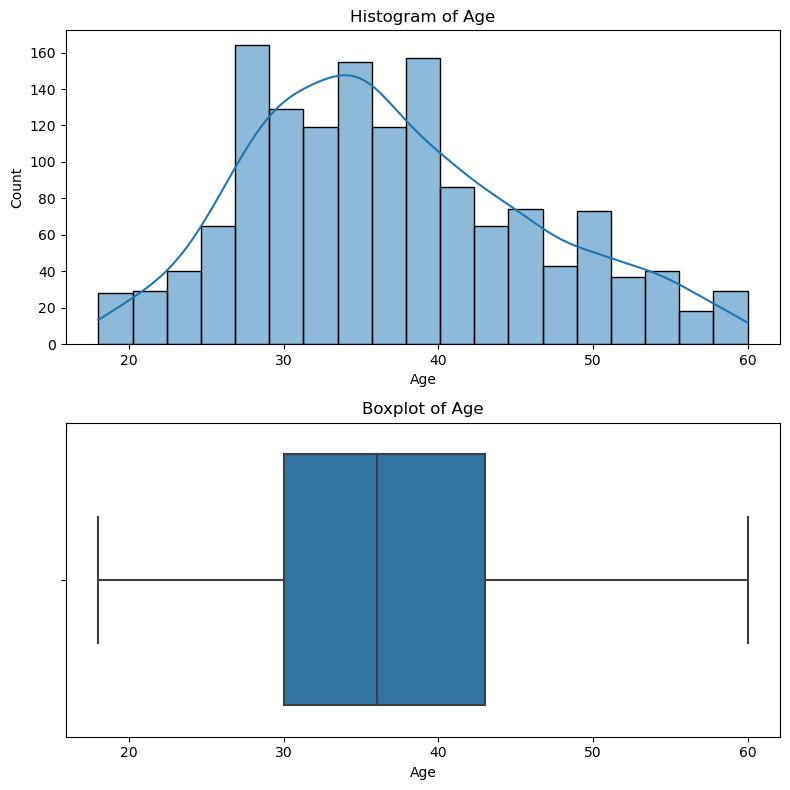

In [40]:
# Histogram and Boxplot of Age
# Creating the subplots
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(8, 8))

# Histogram of Age
sns.histplot(data=df, x='Age', ax=axes[0], kde=True)
axes[0].set_title('Histogram of Age')

# Boxplot of Age
sns.boxplot(data=df, x='Age', ax=axes[1])
axes[1].set_title('Boxplot of Age')

plt.tight_layout()
plt.show()

- The *Age* column seems to be normally distributed with most employees falling in the range of 30-40.

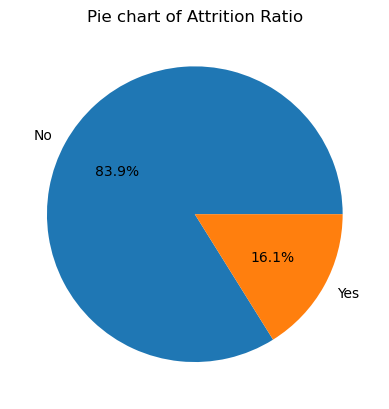

In [41]:
# Pie chart of Attrition Rate
atr_count = df['Attrition'].value_counts(normalize=True) * 100
plt.title('Pie chart of Attrition Ratio')
plt.pie(x = atr_count.values, labels=atr_count.index, autopct='%.1f%%')
plt.show()

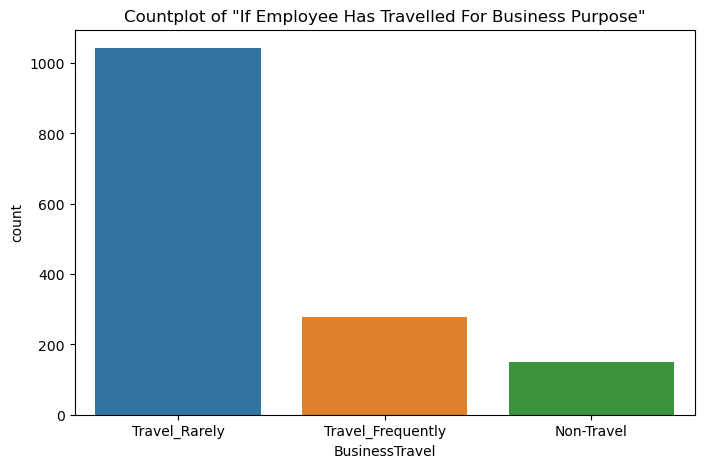

In [42]:
# Countplot of BusinessTravel
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='BusinessTravel')
plt.title('Countplot of "If Employee Has Travelled For Business Purpose"')
plt.show()

C:\Users\Abhishek Kare\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


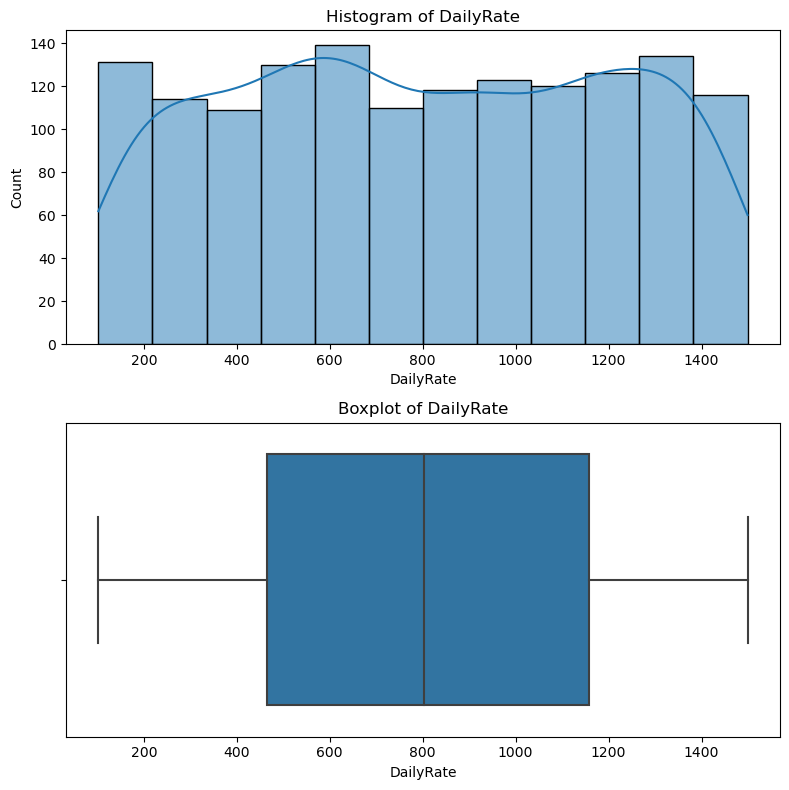

In [43]:
# Histogram and Boxplot of DailyRate
# Creating the subplots
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(8, 8))

# Histogram of Age
sns.histplot(data=df, x='DailyRate', ax=axes[0], kde=True)
axes[0].set_title('Histogram of DailyRate')

# Boxplot of Age
sns.boxplot(data=df, x='DailyRate', ax=axes[1])
axes[1].set_title('Boxplot of DailyRate')

plt.tight_layout()
plt.show()

- The *DailyRate* refers to the rate of pay per day of the employees. The data is almost uniformly distributed with slight fluctuations in the count of employees.

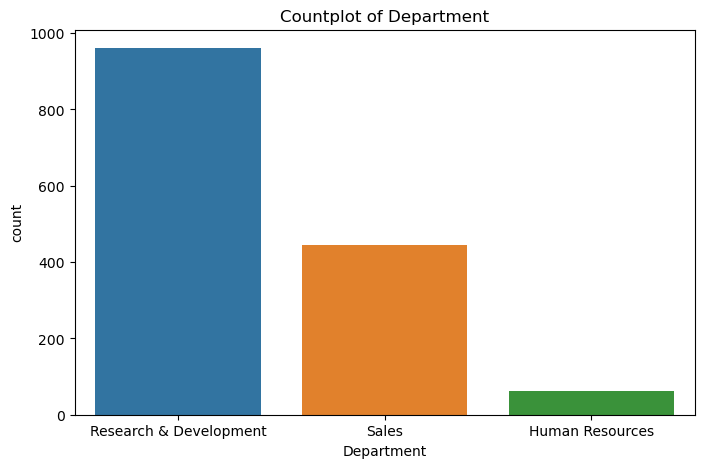

In [44]:
# Countplot of Department
dept_order = df['Department'].value_counts().index

plt.figure(figsize=(8,5))
sns.countplot(data=df, x='Department', order=dept_order)
plt.title('Countplot of Department')
plt.show()

C:\Users\Abhishek Kare\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


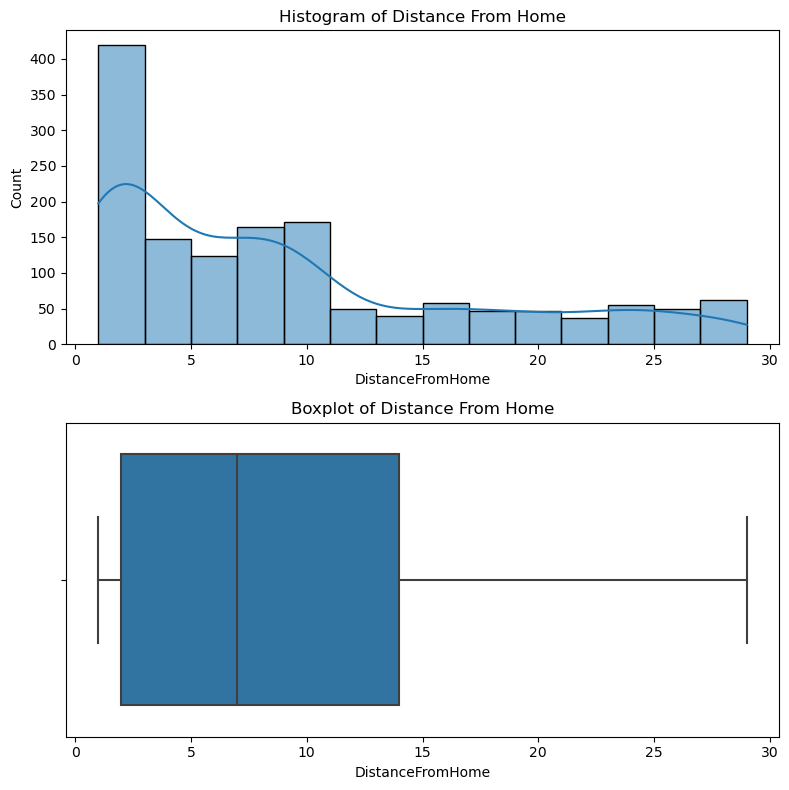

In [45]:
# Histogram and Boxplot of DistanceFromHome
# Creating the subplots
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(8, 8))

# Histogram of Age
sns.histplot(data=df, x='DistanceFromHome', ax=axes[0], kde=True)
axes[0].set_title('Histogram of Distance From Home')

# Boxplot of Age
sns.boxplot(data=df, x='DistanceFromHome', ax=axes[1])
axes[1].set_title('Boxplot of Distance From Home')

plt.tight_layout()
plt.show()

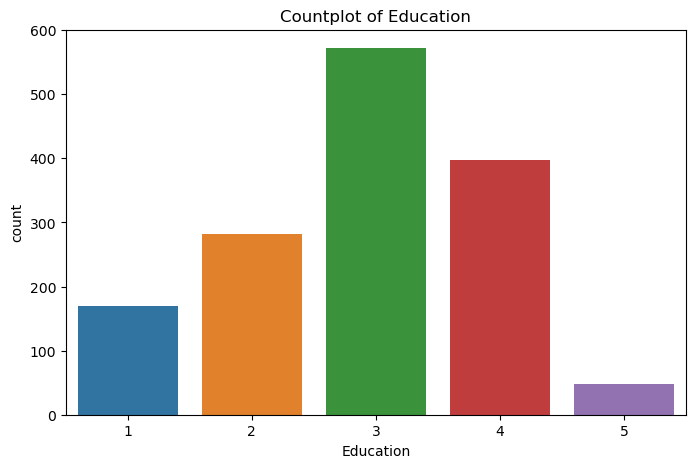

In [46]:
# Countplot of Education
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='Education')
plt.title('Countplot of Education')
plt.show()

- Majority of the employees have an average education level of 3. Very few employees have an education level of 5.

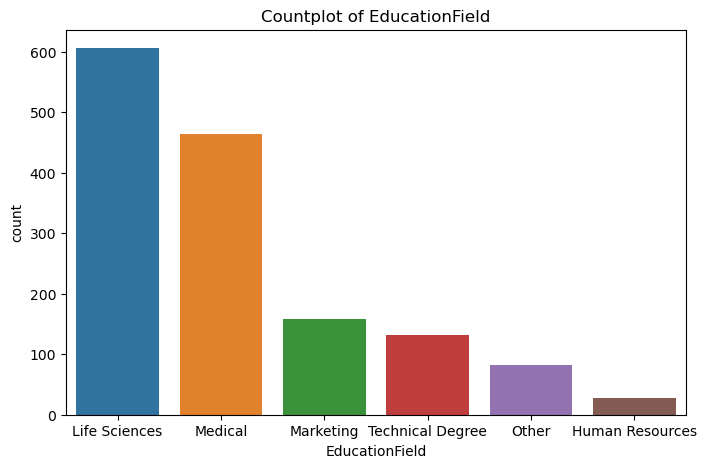

In [47]:
# Countplot of EducationField
edu_order = df['EducationField'].value_counts().index

plt.figure(figsize=(8,5))
sns.countplot(data=df, x='EducationField', order=edu_order)
plt.title('Countplot of EducationField')
plt.show()

- Most of the employees belong to Life Sciences field, followed by Medical and Marketing.

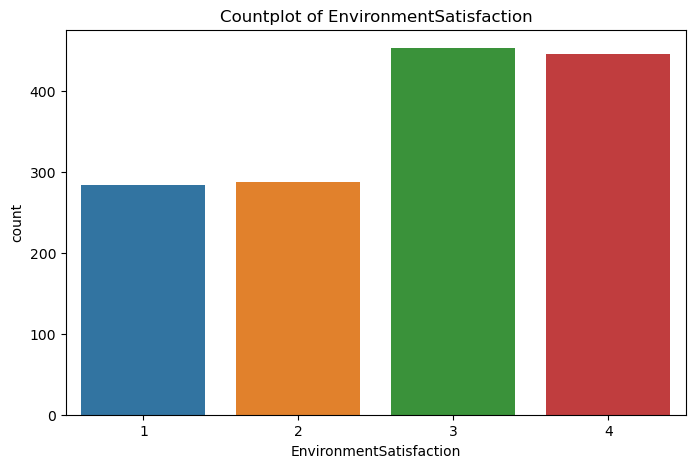

In [48]:
# Countplot of EnvironmentSatisfaction
edu_order = df['EnvironmentSatisfaction'].value_counts().index.sort_values()

plt.figure(figsize=(8,5))
sns.countplot(data=df, x='EnvironmentSatisfaction', order=edu_order)
plt.title('Countplot of EnvironmentSatisfaction')
plt.show()

- Approximately 1000 employees tend to have a good environment satisfaction. Rest of the employees have given a low Enivornment Satisfaction score.

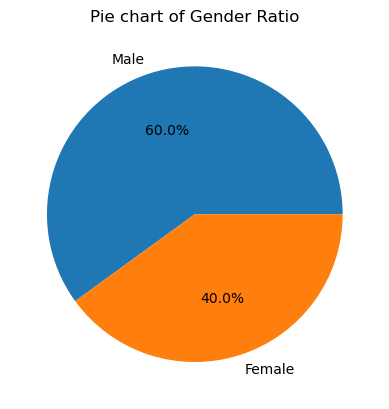

In [49]:
# Pie chart of Gender Ratio
gender_ratio = df['Gender'].value_counts(normalize=True) * 100
plt.title('Pie chart of Gender Ratio')
plt.pie(x = gender_ratio.values, labels=gender_ratio.index, autopct='%.1f%%')
plt.show()

C:\Users\Abhishek Kare\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


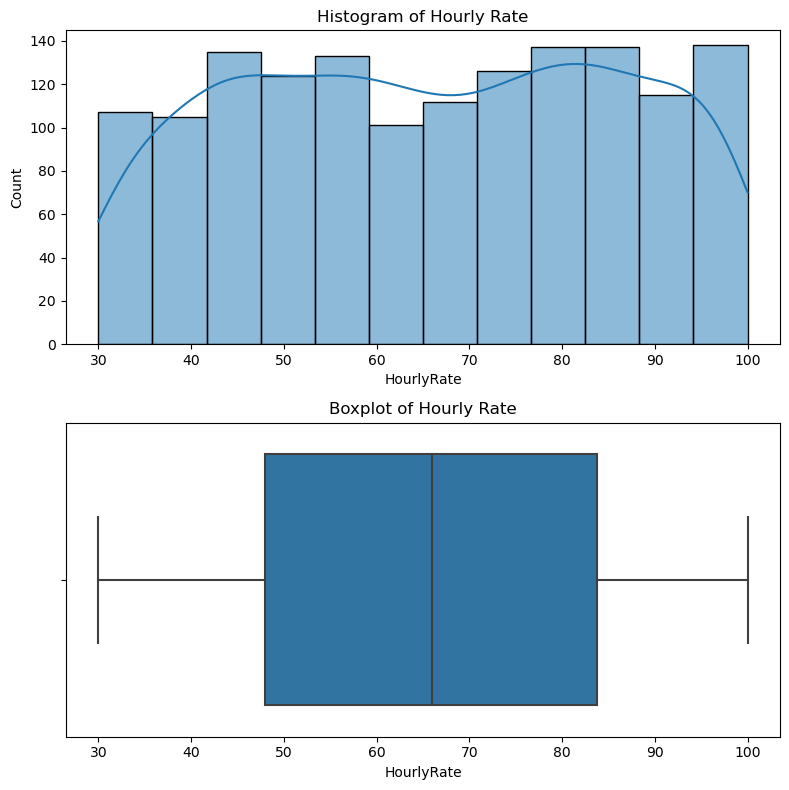

In [50]:
# Histogram and Boxplot of HourlyRate
# Creating the subplots
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(8, 8))

# Histogram of Age
sns.histplot(data=df, x='HourlyRate', ax=axes[0], kde=True)
axes[0].set_title('Histogram of Hourly Rate')

# Boxplot of Age
sns.boxplot(data=df, x='HourlyRate', ax=axes[1])
axes[1].set_title('Boxplot of Hourly Rate')

plt.tight_layout()
plt.show()

- The histogram of Hourly rate seems similar to the histogram of Daily Rate.

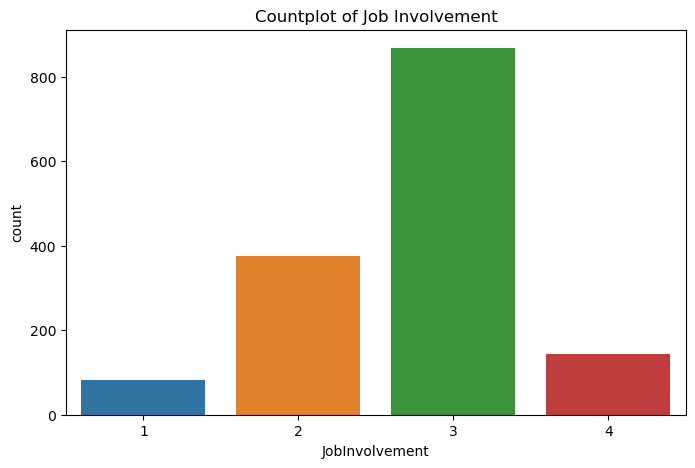

In [51]:
# Countplot of JobInvolvement
edu_order = df['JobInvolvement'].value_counts().index.sort_values()

plt.figure(figsize=(8,5))
sns.countplot(data=df, x='JobInvolvement', order=edu_order)
plt.title('Countplot of Job Involvement')
plt.show()

- Majority of the employees have a job invovlment of level 3. Few of the employees have a level of 1.

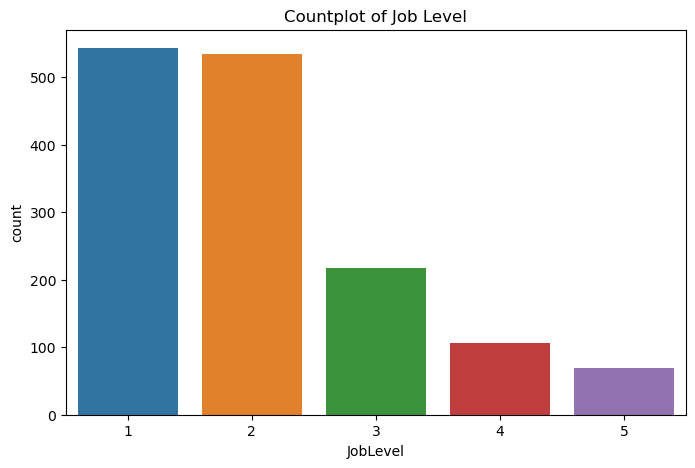

In [52]:
# Countplot of JobLevel
edu_order = df['JobLevel'].value_counts().index.sort_values()

plt.figure(figsize=(8,5))
sns.countplot(data=df, x='JobLevel', order=edu_order)
plt.title('Countplot of Job Level')
plt.show()

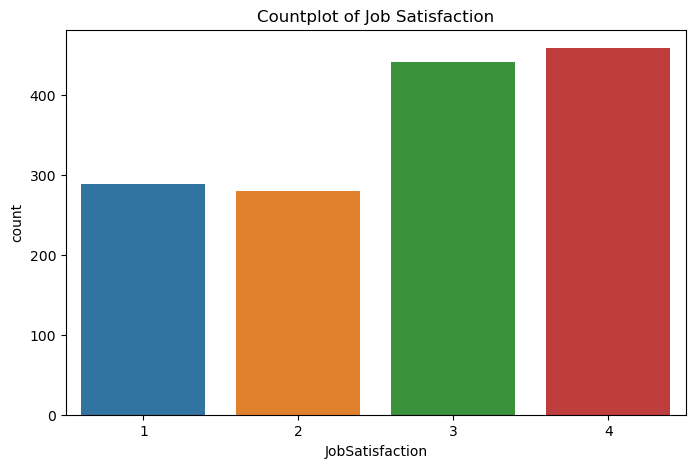

In [53]:
# Countplot of JobSatisfaction
edu_order = df['JobSatisfaction'].value_counts().index.sort_values()

plt.figure(figsize=(8,5))
sns.countplot(data=df, x='JobSatisfaction', order=edu_order)
plt.title('Countplot of Job Satisfaction')
plt.show()

- Most of the employees reported a good job satisfaction score. Job Satisfaction could be a good indicator of Attrition.

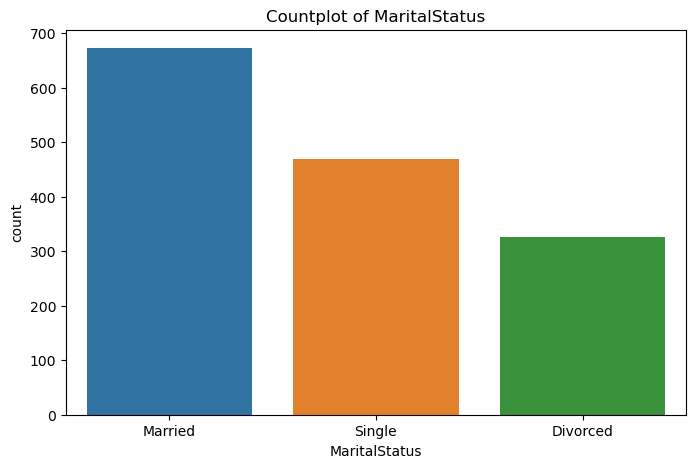

In [54]:
# Countplot of MaritalStatus
edu_order = df['MaritalStatus'].value_counts().index

plt.figure(figsize=(8,5))
sns.countplot(data=df, x='MaritalStatus', order=edu_order)
plt.title('Countplot of MaritalStatus')
plt.show()

- Most of the employees are either Married or Single.

C:\Users\Abhishek Kare\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


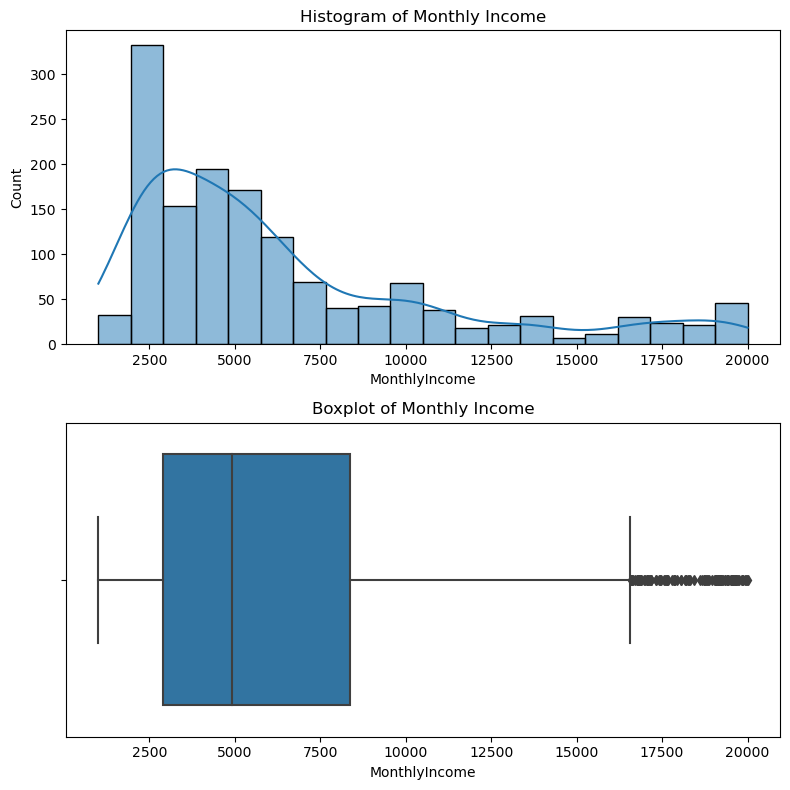

In [55]:
# Histogram and Boxplot of MonthlyIncome
# Creating the subplots
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(8, 8))

# Histogram of Age
sns.histplot(data=df, x='MonthlyIncome', ax=axes[0], kde=True)
axes[0].set_title('Histogram of Monthly Income')

# Boxplot of Age
sns.boxplot(data=df, x='MonthlyIncome', ax=axes[1])
axes[1].set_title('Boxplot of Monthly Income')

plt.tight_layout()
plt.show()

- The dataset seems to be Right skewed with most values in the range of 2500 to 6000.
- There are a few outliers in the data. We will not be dropping these values as they seem relevant to the data.

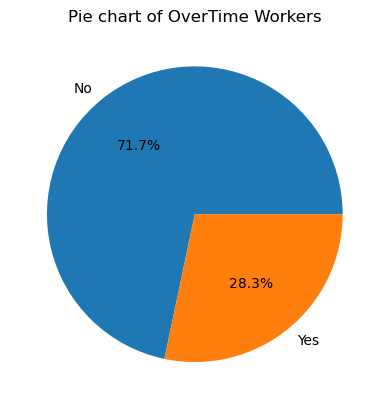

In [56]:
# Pie chart of OverTime
overtime_ratio = df['OverTime'].value_counts(normalize=True) * 100
plt.title('Pie chart of OverTime Workers')
plt.pie(x = overtime_ratio.values, labels=overtime_ratio.index, autopct='%.1f%%')
plt.show()

- Around 30% of the employees tend to work overtime. Overworking might be an important indicator that affects the Attrition.

C:\Users\Abhishek Kare\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


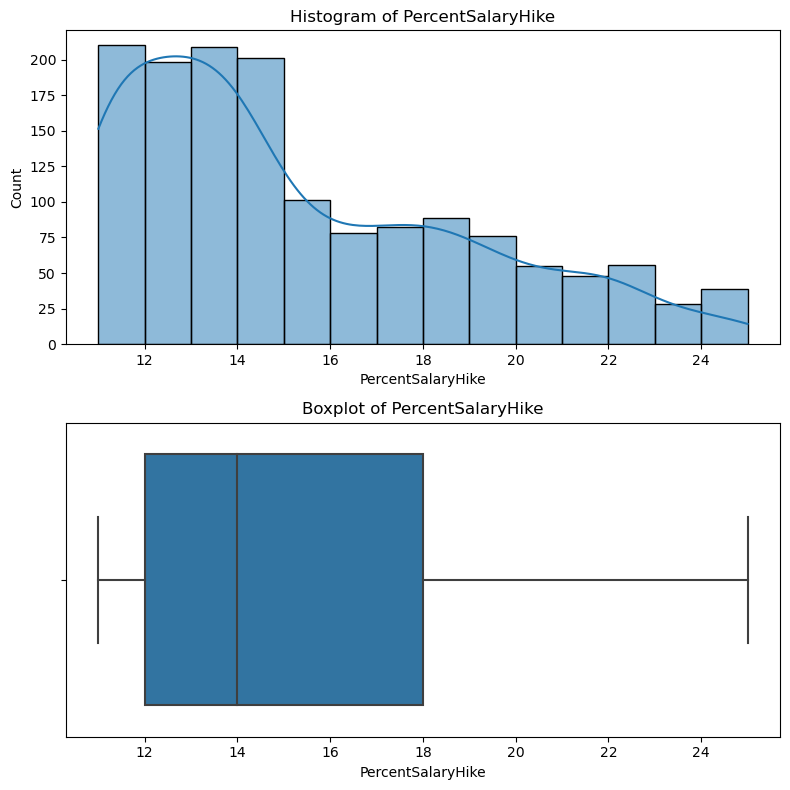

In [57]:
# Histogram and Boxplot of PercentSalaryHike
# Creating the subplots
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(8, 8))

# Histogram of Age
sns.histplot(data=df, x='PercentSalaryHike', ax=axes[0], kde=True)
axes[0].set_title('Histogram of PercentSalaryHike')

# Boxplot of Age
sns.boxplot(data=df, x='PercentSalaryHike', ax=axes[1])
axes[1].set_title('Boxplot of PercentSalaryHike')

plt.tight_layout()
plt.show()

- The *PercentSalaryHike* is right skewed with majority employees falling in the salary hike percentage of 11-15%.

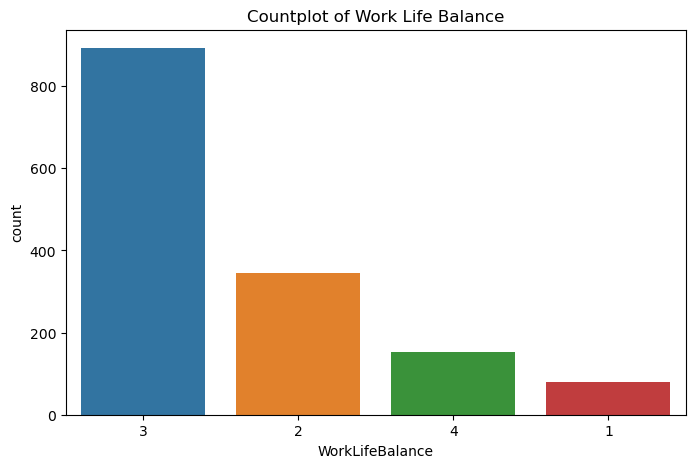

In [58]:
# Countplot of WorkLifeBalance
edu_order = df['WorkLifeBalance'].value_counts().index

plt.figure(figsize=(8,5))
sns.countplot(data=df, x='WorkLifeBalance', order=edu_order)
plt.title('Countplot of Work Life Balance')
plt.show()

### Bivariate Data Analysis

In [59]:
# Frequency of Business Travel and Attrition Rate
travel_atr = round(df.groupby('BusinessTravel')['Attrition'].value_counts(normalize=True) * 100,2)
travel_df = travel_atr.unstack()
travel_df

Attrition,No,Yes
BusinessTravel,,
Non-Travel,92.00,8.00
Travel_Frequently,75.09,24.91
Travel_Rarely,85.04,14.96


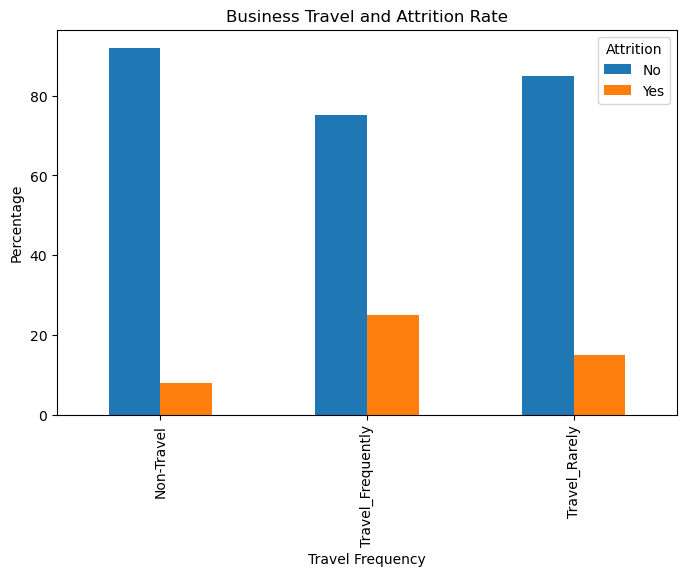

In [60]:
# Barplot of Business Travel and Attrition Rate
travel_df.plot(kind='bar', figsize=(8,5))
plt.title('Business Travel and Attrition Rate')
plt.xlabel('Travel Frequency')
plt.ylabel('Percentage')
plt.show()

- Those who tend to travel Frequently have a higher rate of Attrition comparatively (Approx. 25% of Attrition Rate).

In [61]:
# Frequency of Department and Attrition Rate
dept_atr = round(df.groupby('Department')['Attrition'].value_counts(normalize=True) * 100, 2)
dept_df = dept_atr.unstack()
dept_df

Attrition,No,Yes
Department,,
Human Resources,80.95,19.05
Research & Development,86.16,13.84
Sales,79.37,20.63


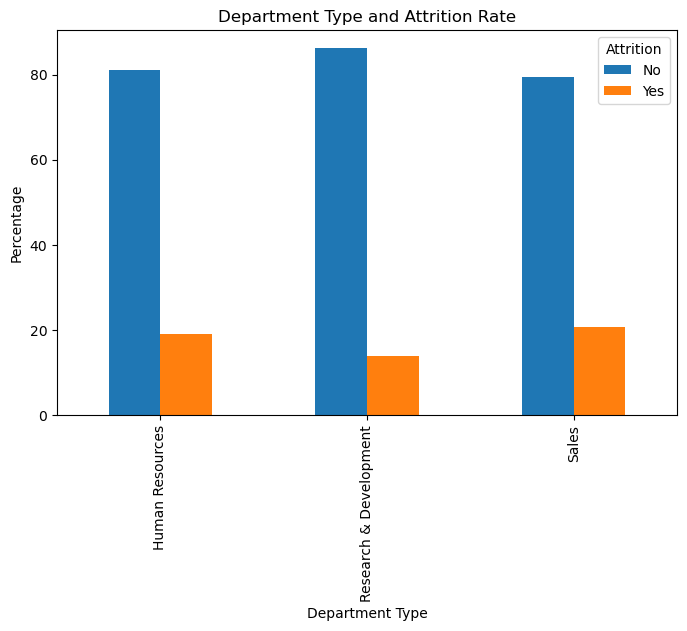

In [62]:
# Barplot of Department Type and Attrition Rate
dept_df.plot(kind='bar', figsize=(8,5))
plt.title('Department Type and Attrition Rate')
plt.xlabel('Department Type')
plt.ylabel('Percentage')
plt.show()

- Sales has the highest Attrition Rate (Around 20%) comparatively, followed by Human Resources and the least being Research and Development.

In [63]:
# Percentage of Attrition according to education level
edu_atr = round(df.groupby('Education')['Attrition'].value_counts(normalize=True) * 100, 2)
edu_df = edu_atr.unstack()
edu_df

Attrition,No,Yes
Education,,
1,81.76,18.24
2,84.40,15.60
3,82.69,17.31
4,85.43,14.57
5,89.58,10.42


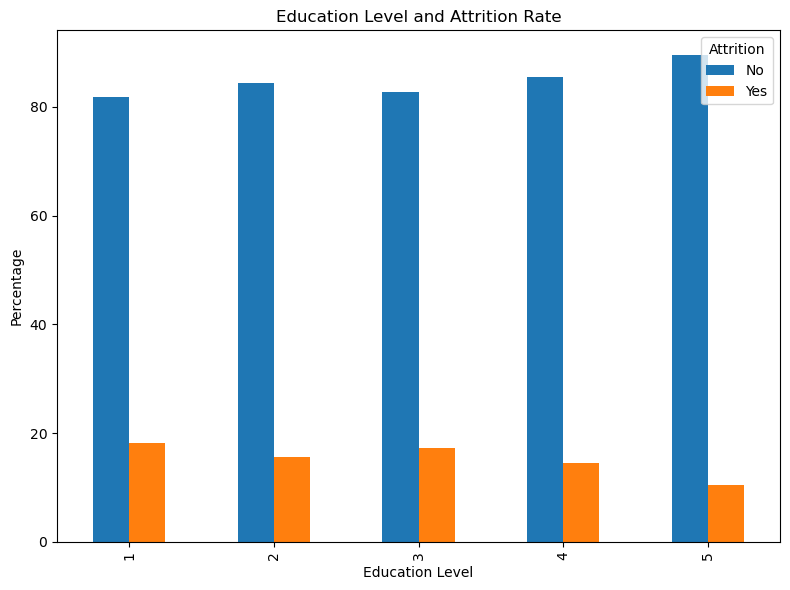

In [64]:
# Barplot of Education Level and Attrition Rate
edu_df.plot(kind='bar', figsize=(8,6))
plt.title('Education Level and Attrition Rate')
plt.xlabel('Education Level')
plt.ylabel('Percentage')
plt.tight_layout()
plt.show()

- Attrition Percentage is slightly higher in employees with education levels 1 and 3. There is a slight drop in Attrition rate for education level 2 and 1. The least attrition percentage being for level 5.

In [65]:
edu_atr = round(df.groupby('EducationField')['Attrition'].value_counts(normalize=True) * 100,2)
edu_df = edu_atr.unstack()
edu_df

Attrition,No,Yes
EducationField,,
Human Resources,74.07,25.93
Life Sciences,85.31,14.69
Marketing,77.99,22.01
Medical,86.42,13.58
Other,86.59,13.41
Technical Degree,75.76,24.24


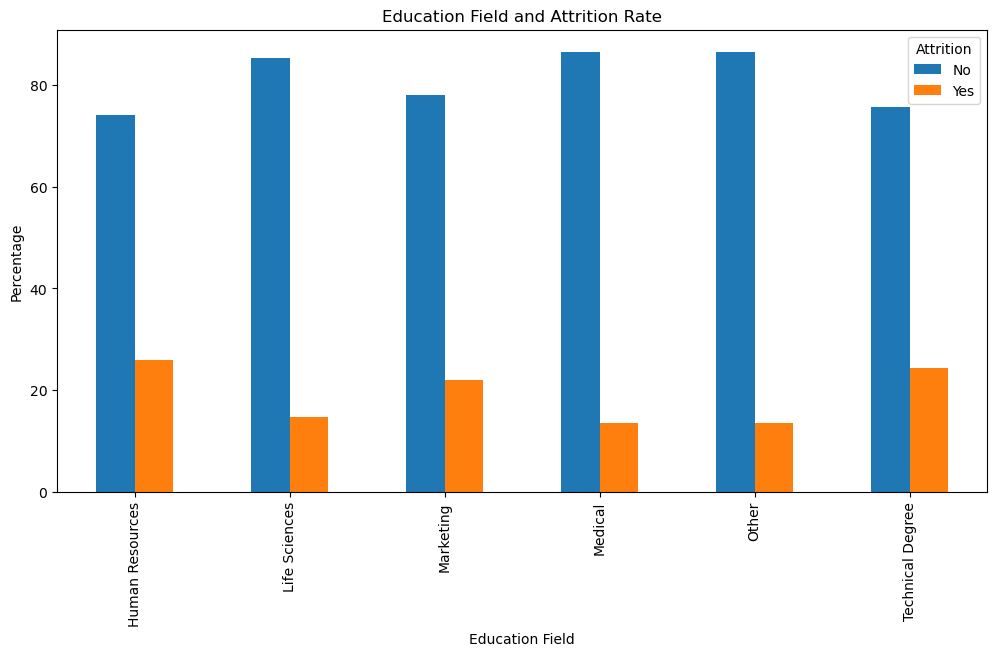

In [66]:
# Barplot of Education Field and Attrition Rate
edu_df.plot(kind='bar', figsize=(12,6))
plt.title('Education Field and Attrition Rate')
plt.xlabel('Education Field')
plt.ylabel('Percentage')
plt.show()

- Employees with Education Field as Human Resources have the highest Attrition Rate, followed by employees with Technical degree and Marketing.
- Employees with Education background in Medical field have a low percentage of Attrition.

In [67]:
# Grouping by Gender and getting the percentage of Attrition
gen_atr = round(df.groupby('Gender')['Attrition'].value_counts(normalize=True) * 100, 2)
gen_df = gen_atr.unstack()
gen_df

Attrition,No,Yes
Gender,,
Female,85.20,14.80
Male,82.99,17.01


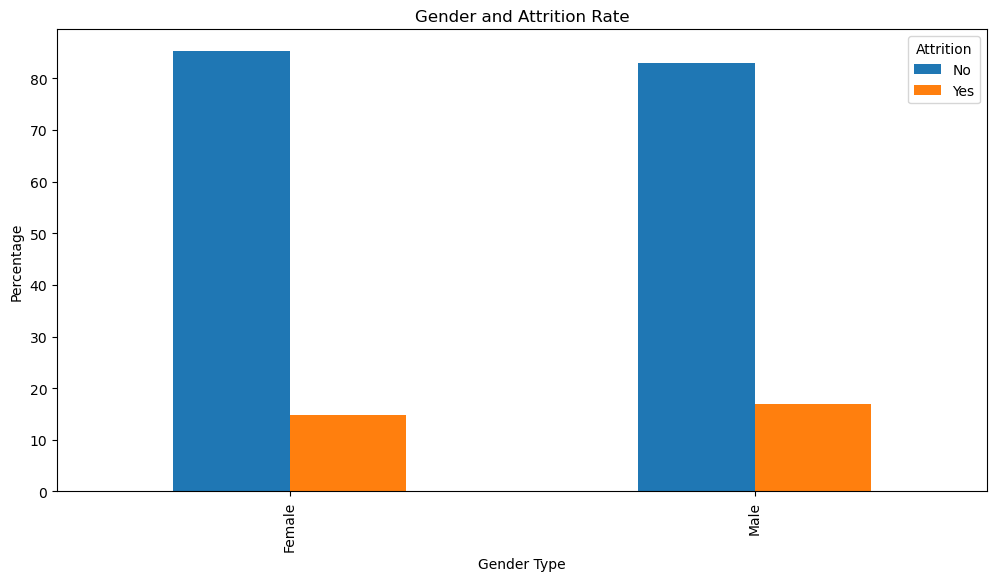

In [68]:
# Barplot of Gender and Attrition Rate
gen_df.plot(kind='bar', figsize=(12,6))
plt.title('Gender and Attrition Rate')
plt.xlabel('Gender Type')
plt.ylabel('Percentage')
plt.show()

- Males have a slightly higher Attrition percentage than Females.

In [69]:
# Grouping by Jobinvolvement and getting the Attrition Rate
job_atr = round(df.groupby('JobInvolvement')['Attrition'].value_counts(normalize=True) * 100, 2)
job_df = job_atr.unstack()
job_df

Attrition,No,Yes
JobInvolvement,,
1,66.27,33.73
2,81.07,18.93
3,85.60,14.40
4,90.97,9.03


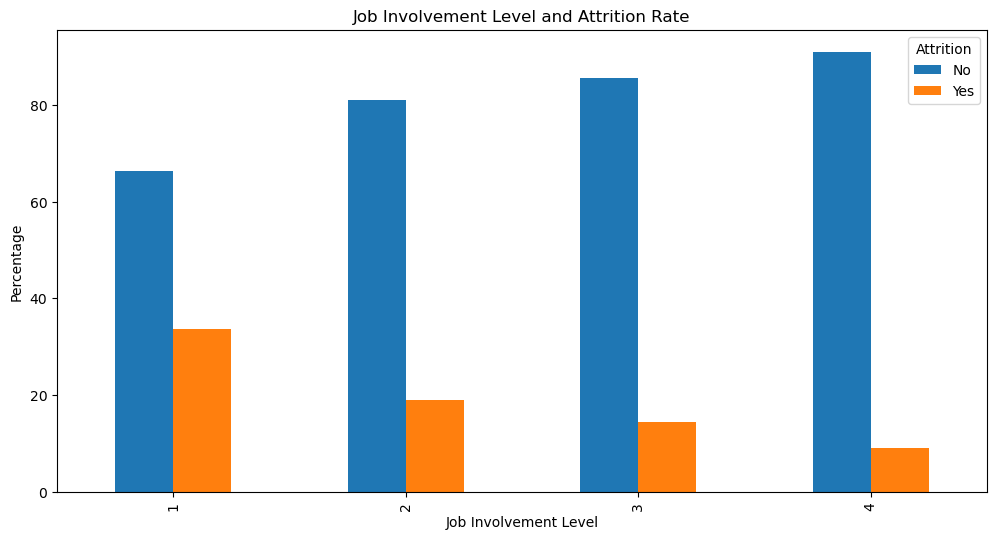

In [70]:
# Barplot of JobInolvement and Attrition Rate
job_df.plot(kind='bar', figsize=(12,6))
plt.title('Job Involvement Level and Attrition Rate')
plt.xlabel('Job Involvement Level')
plt.ylabel('Percentage')
plt.show()

- Employees with Job Involvement Level as 1 have the highest Attrition Rate. 
- The Attrition Rate tends to drop as the Job Involvement level increases.
- Job Involvement level is a good indicator of Attrition.

In [71]:
# Grouping by EnvironmentSatisfaction and getting the Attrition Rate
env_atr = round(df.groupby('EnvironmentSatisfaction')['Attrition'].value_counts(normalize=True) * 100, 2)
env_df = env_atr.unstack()
env_df

Attrition,No,Yes
EnvironmentSatisfaction,,
1,74.65,25.35
2,85.02,14.98
3,86.31,13.69
4,86.55,13.45


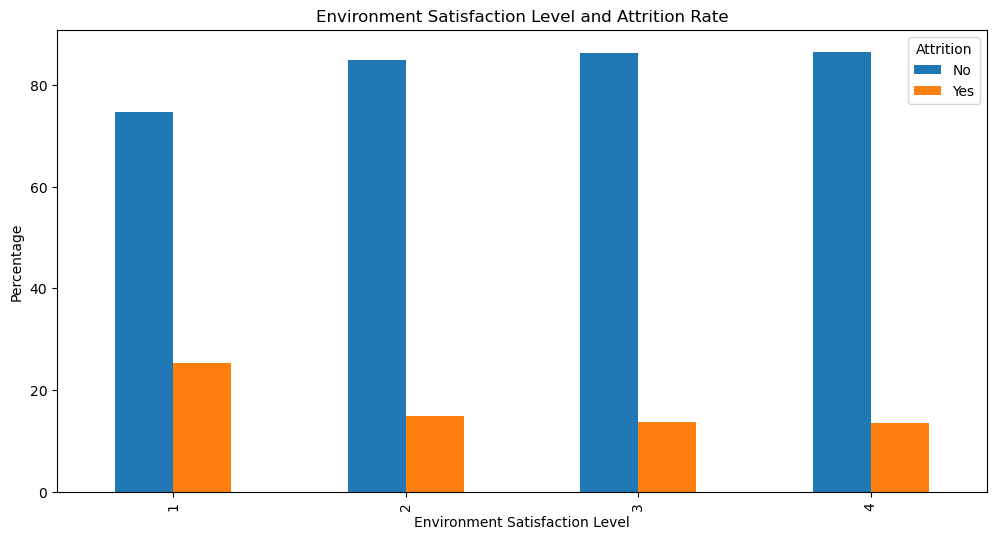

In [72]:
# Barplot of EnvironmentSatisfaction and Attrition Rate
env_df.plot(kind='bar', figsize=(12,6))
plt.title('Environment Satisfaction Level and Attrition Rate')
plt.xlabel('Environment Satisfaction Level')
plt.ylabel('Percentage')
plt.show()

- Employees with Environment satisfaction level 1 has the highest Attrition percentage.
- As the Environment satisfaction level increases the Attrition percentage decreases.
- Environment Satisfaction level is a good indicator of Attrition.

In [73]:
# Grouping by JobLevel and getting the Attrition Rate
job_lvl_atr = round(df.groupby('JobLevel')['Attrition'].value_counts(normalize=True) * 100, 2)
job_lvl_df = job_lvl_atr.unstack()
job_lvl_df

Attrition,No,Yes
JobLevel,,
1,73.66,26.34
2,90.26,9.74
3,85.32,14.68
4,95.28,4.72
5,92.75,7.25


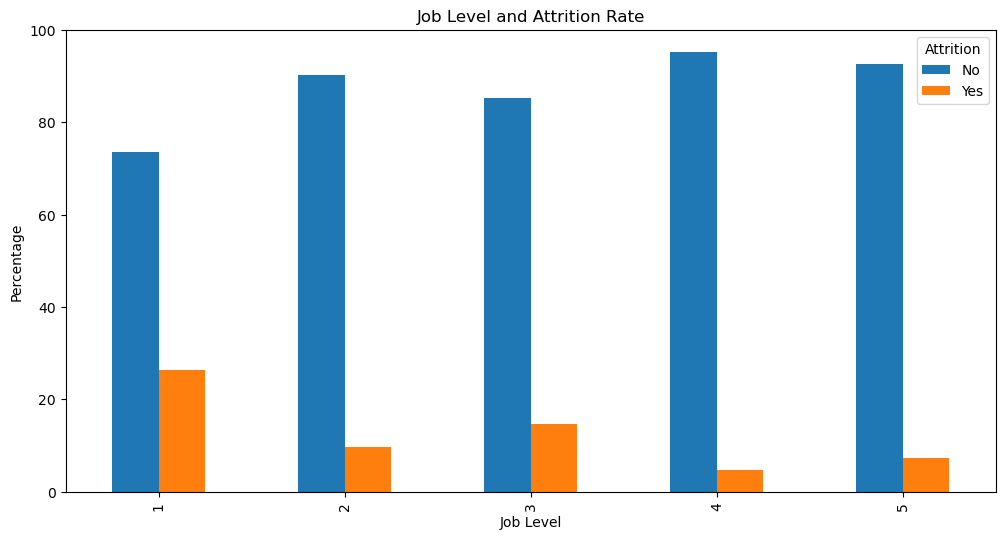

In [74]:
# Barplot of Job level and Attrition Rate
job_lvl_df.plot(kind='bar', figsize=(12,6))
plt.title('Job Level and Attrition Rate')
plt.xlabel('Job Level')
plt.ylabel('Percentage')
plt.show()

- Employees with Job level 1 tend to have a high Attrition percentage.
- There is an increase at Job level 3 despite the drop after Job level 1 which drops again later after level 3.

In [75]:
# Grouping by MaritalStatus and getting the Attrition Rate
mar_atr = round(df.groupby('MaritalStatus')['Attrition'].value_counts(normalize=True) * 100, 2)
mar_df = mar_atr.unstack()
mar_df

Attrition,No,Yes
MaritalStatus,,
Divorced,89.91,10.09
Married,87.52,12.48
Single,74.47,25.53


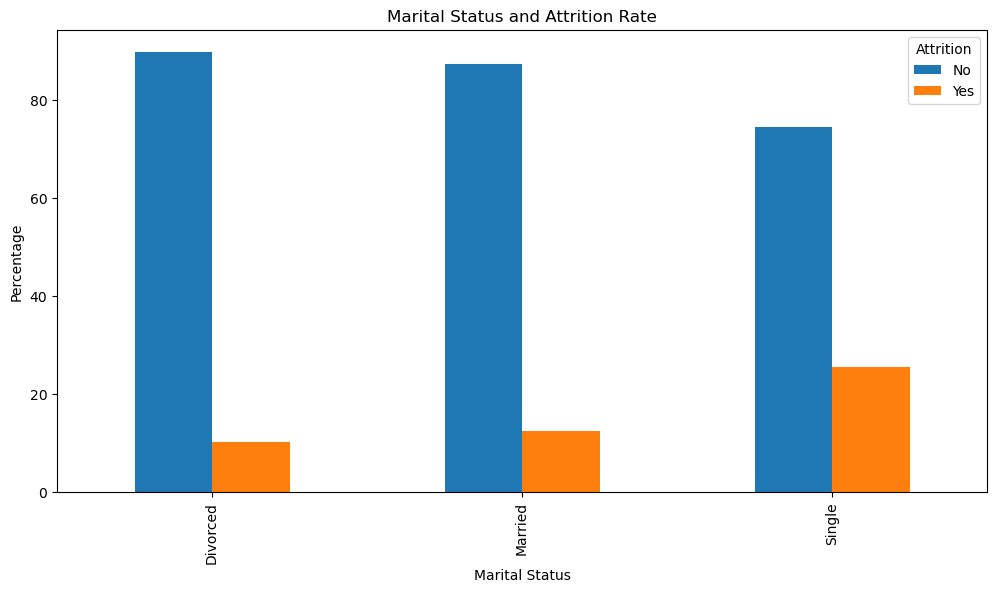

In [76]:
# Barplot of marital status and Attrition Rate
mar_df.plot(kind='bar', figsize=(12,6))
plt.title('Marital Status and Attrition Rate')
plt.xlabel('Marital Status')
plt.ylabel('Percentage')
plt.show()

- Employees who are single tend to have a higher Attrition rate than Married and Divorced employees.

In [77]:
# Grouping by Overtime and getting the Attrition Rate
ovr_atr = round(df.groupby('OverTime')['Attrition'].value_counts(normalize=True) * 100, 2)
ovr_df = ovr_atr.unstack()
ovr_df

Attrition,No,Yes
OverTime,,
No,89.56,10.44
Yes,69.47,30.53


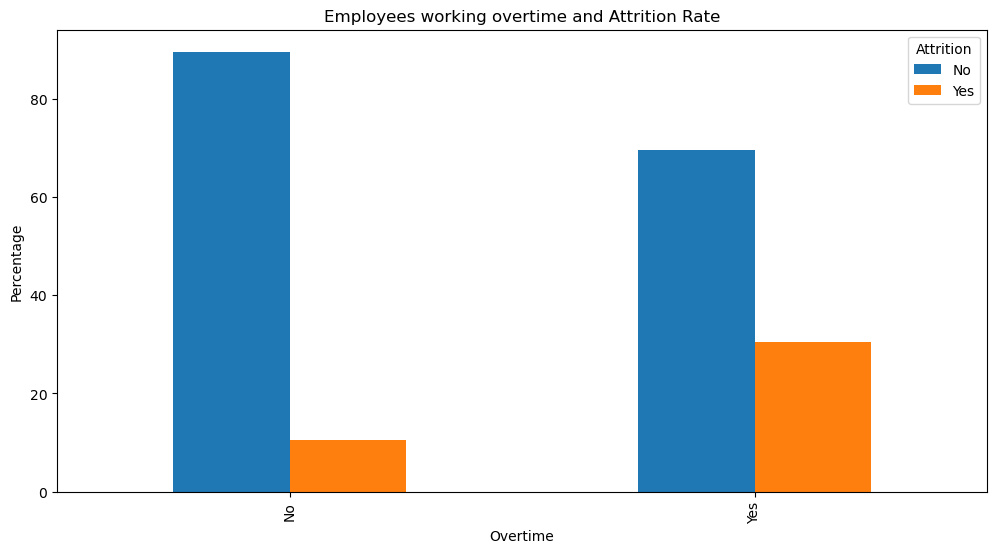

In [78]:
# Barplot of Overtime and Attrition Rate
ovr_df.plot(kind='bar', figsize=(12,6))
plt.title('Employees working overtime and Attrition Rate')
plt.xlabel('Overtime')
plt.ylabel('Percentage')
plt.show()

- There is a significant difference in the Attrition rate of those who work overtime and employees who don't.
- Out of all the employees who work overtime, 30% of the employees tend to have an Attrition.

In [79]:
# Grouping by WorkLifeBalance and getting the Attrition Rate
wrk_atr = round(df.groupby('WorkLifeBalance')['Attrition'].value_counts(normalize=True) * 100, 2)
wrk_df = wrk_atr.unstack()
wrk_df

Attrition,No,Yes
WorkLifeBalance,,
1,68.75,31.25
2,83.14,16.86
3,85.78,14.22
4,82.35,17.65


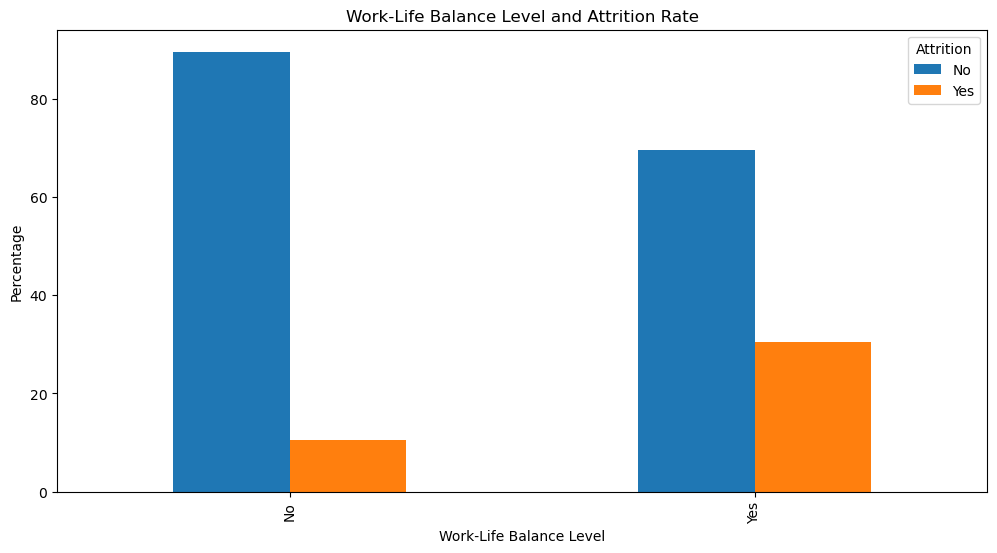

In [80]:
# Barplot of Worklifebalance and Attrition Rate
ovr_df.plot(kind='bar', figsize=(12,6))
plt.title('Work-Life Balance Level and Attrition Rate')
plt.xlabel('Work-Life Balance Level')
plt.ylabel('Percentage')
plt.show()

- Employees with a low level of Work-Life Balance tend to have a higher percentage of Attrition.

### Multivariate Data Analysis

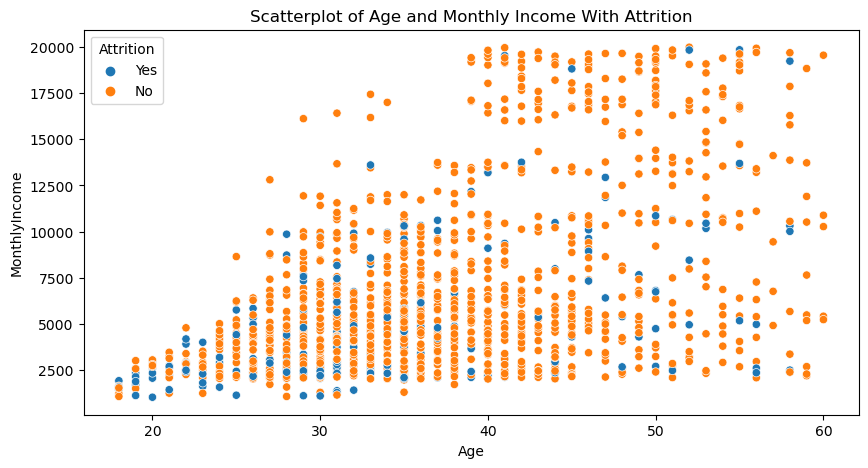

In [81]:
# Scatterplot of Age and MonthlyIncome with Attrition as hue
plt.figure(figsize=(10,5))
sns.scatterplot(data=df, x='Age', y='MonthlyIncome', hue='Attrition')
plt.title('Scatterplot of Age and Monthly Income With Attrition')
plt.show()

- Most of the employees who have an Attrition lie below the Monthly Income of 15000.
- In terms of Age, employees below 30 have a good number of Attrition values. 

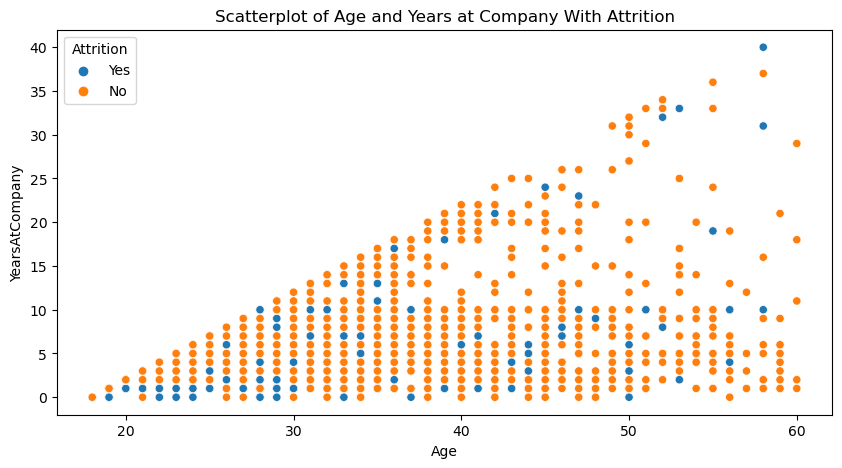

In [82]:
# Scatterplot of Age and YearsAtCompany with Attrition as hue
plt.figure(figsize=(10,5))
sns.scatterplot(data=df, x='Age', y='YearsAtCompany', hue='Attrition')
plt.title('Scatterplot of Age and Years at Company With Attrition')
plt.show()

- Employees with years at company below 10 tend to have a high Attrition count.
- Employees below the age of 35 have a high Attrition count.

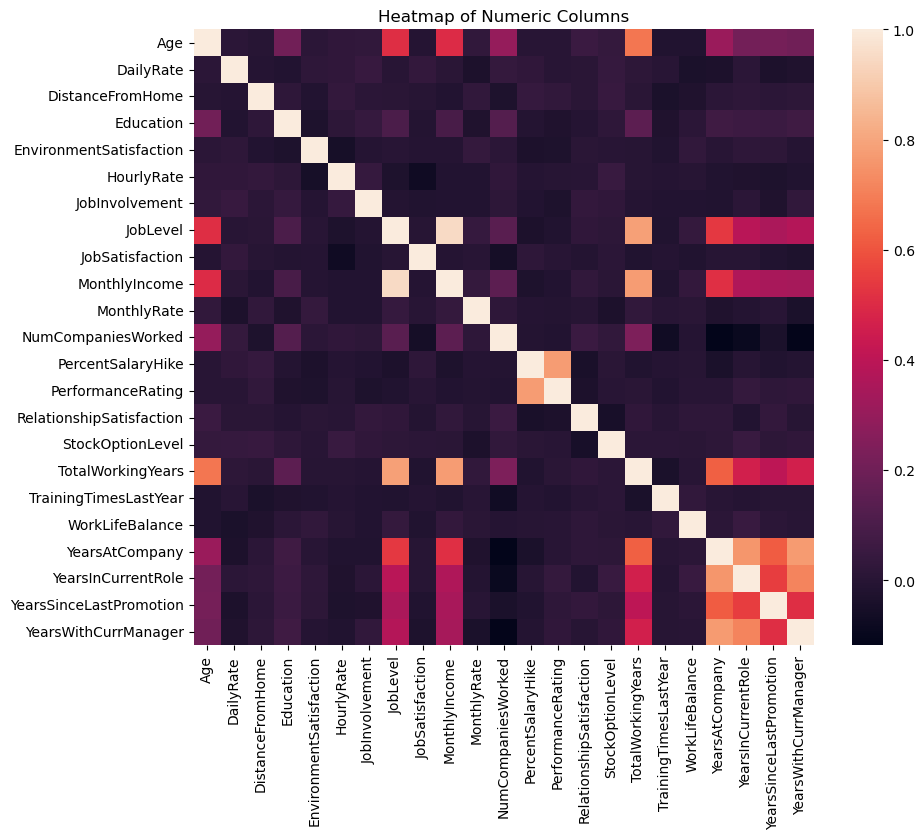

In [83]:
# Heatmap of all the numeric columns
plt.figure(figsize=(10,8))
sns.heatmap(df.select_dtypes(include='number').corr())
plt.title("Heatmap of Numeric Columns")
plt.show()

- Few of the features have a strong correlation. We will keep these features for now and drop if required later on during the model building phase.

## Data Preprocessing

In [84]:
# Performing one-hot encoding for binary features
binary_cols = ['Attrition', 'Gender', 'OverTime']

le = LabelEncoder()
for col in binary_cols:
    df[col] = le.fit_transform(df[col])


In [85]:
# Defining the multi-class categorical columns
multi_cat_cols = ['BusinessTravel', 'Department', 'EducationField', 'JobRole', 'MaritalStatus']

# Performing one-hot encoding
df_dummies = pd.get_dummies(df[multi_cat_cols], drop_first=True)

# Concatenating encoded columns to the original df
df_encoded = pd.concat([df, df_dummies], axis=1)

# Dropping the original multi-class categorical columns
df_encoded.drop(columns=multi_cat_cols, inplace=True)

In [86]:
# Final dataset for model building
df_encoded

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single
0,41,1,1102,1,2,2,0,94,3,2,4,5993,19479,8,1,11,3,1,0,8,0,1,6,4,0,5,False,True,False,True,True,False,False,False,False,False,False,False,False,False,False,True,False,False,True
1,49,0,279,8,1,3,1,61,2,2,2,5130,24907,1,0,23,4,4,1,10,3,3,10,7,1,7,True,False,True,False,True,False,False,False,False,False,False,False,False,False,True,False,False,True,False
2,37,1,1373,2,2,4,1,92,2,1,3,2090,2396,6,1,15,3,2,0,7,3,3,0,0,0,0,False,True,True,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,True
3,33,0,1392,3,4,4,0,56,3,1,3,2909,23159,1,1,11,3,3,0,8,3,3,8,7,3,0,True,False,True,False,True,False,False,False,False,False,False,False,False,False,True,False,False,True,False
4,27,0,591,2,1,1,1,40,3,1,2,3468,16632,9,0,12,3,4,1,6,3,3,2,2,2,2,False,True,True,False,False,False,True,False,False,False,True,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,884,23,2,3,1,41,4,2,4,2571,12290,4,0,17,3,3,1,17,3,3,5,2,0,3,True,False,True,False,False,False,True,False,False,False,True,False,False,False,False,False,False,True,False
1466,39,0,613,6,1,4,1,42,2,3,1,9991,21457,4,0,15,3,1,1,9,5,3,7,7,1,7,False,True,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False
1467,27,0,155,4,3,2,1,87,4,2,2,6142,5174,1,1,20,4,2,1,6,0,3,6,2,0,3,False,True,True,False,True,False,False,False,False,False,False,False,True,False,False,False,False,True,False
1468,49,0,1023,2,3,4,1,63,2,2,2,5390,13243,2,0,14,3,4,0,17,3,2,9,6,0,8,True,False,False,True,False,False,True,False,False,False,False,False,False,False,False,True,False,True,False


## Data Modelling

In [87]:
# Split data
X = df_encoded.drop('Attrition', axis=1)
y = df_encoded['Attrition']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42, stratify=y)


# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [88]:
# Training logistic regression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_scaled, y_train)

# Evaluating
y_pred = lr.predict(X_test_scaled)
print("Logistic Regression:\n", classification_report(y_test, y_pred))

Logistic Regression:
               precision    recall  f1-score   support

           0       0.90      0.96      0.93       493
           1       0.67      0.42      0.52        95

    accuracy                           0.87       588
   macro avg       0.78      0.69      0.72       588
weighted avg       0.86      0.87      0.86       588



In [89]:
# Training Random Forest Classifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_scaled, y_train)

# Evaluating
y_pred_rf = rf.predict(X_test_scaled)
print("Random Forest:\n", classification_report(y_test, y_pred_rf))

Random Forest:
               precision    recall  f1-score   support

           0       0.86      0.98      0.92       493
           1       0.62      0.16      0.25        95

    accuracy                           0.85       588
   macro avg       0.74      0.57      0.58       588
weighted avg       0.82      0.85      0.81       588



In [90]:
# Training XGB Classifier
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb.fit(X_train, y_train)

# Evaluating
y_pred_xgb = xgb.predict(X_test)
print("XGBoost:\n", classification_report(y_test, y_pred_xgb))

XGBoost:
               precision    recall  f1-score   support

           0       0.88      0.97      0.92       493
           1       0.64      0.28      0.39        95

    accuracy                           0.86       588
   macro avg       0.76      0.63      0.66       588
weighted avg       0.84      0.86      0.84       588



C:\Users\Abhishek Kare\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [15:30:49] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [91]:
# Training SVC model
svm = SVC()
svm.fit(X_train_scaled, y_train)

# Evaluating
y_pred_svm = svm.predict(X_test_scaled)
print("SVM:\n", classification_report(y_test, y_pred_svm))

SVM:
               precision    recall  f1-score   support

           0       0.86      0.99      0.92       493
           1       0.74      0.18      0.29        95

    accuracy                           0.86       588
   macro avg       0.80      0.58      0.60       588
weighted avg       0.84      0.86      0.82       588



In [92]:
# Tuning Logistic Regression Model

# Define logistic regression model
lr = LogisticRegression(max_iter=1000)

# Define parameter grid for tuning
param_dist = {
    'C': np.logspace(-4, 4, 20),
    'penalty': ['l1', 'l2'],   
    'solver': ['liblinear'],  
}

# Define KFold cross-validator
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Setup RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=lr,
    param_distributions=param_dist,
    n_iter=20,             
    scoring='f1',           
    cv=kf,
    verbose=1,
    random_state=42,
    n_jobs=-1
)

# Fit random search on scaled training data
random_search.fit(X_train_scaled, y_train)

# Best estimator after hyperparameter tuning
best_lr = random_search.best_estimator_

# Predict on test set
y_pred = best_lr.predict(X_test_scaled)

# Classification report
print("Logistic Regression after RandomizedSearchCV:\n", classification_report(y_test, y_pred))


Fitting 5 folds for each of 20 candidates, totalling 100 fits
Logistic Regression after RandomizedSearchCV:
               precision    recall  f1-score   support

           0       0.89      0.97      0.93       493
           1       0.70      0.37      0.48        95

    accuracy                           0.87       588
   macro avg       0.79      0.67      0.71       588
weighted avg       0.86      0.87      0.86       588



In [93]:
# Tuning Random Forest Classifier Model

rf = RandomForestClassifier(random_state=42)

param_dist_rf = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [None, 5, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

random_search_rf = RandomizedSearchCV(
    rf,
    param_distributions=param_dist_rf,
    n_iter=20,
    scoring='f1',
    cv=kf,
    verbose=1,
    random_state=42,
    n_jobs=-1
)

random_search_rf.fit(X_train_scaled, y_train)

best_rf = random_search_rf.best_estimator_

y_pred_rf = best_rf.predict(X_test_scaled)
print("Random Forest after RandomizedSearchCV:\n", classification_report(y_test, y_pred_rf))


Fitting 5 folds for each of 20 candidates, totalling 100 fits
Random Forest after RandomizedSearchCV:
               precision    recall  f1-score   support

           0       0.86      0.98      0.92       493
           1       0.64      0.19      0.29        95

    accuracy                           0.85       588
   macro avg       0.75      0.58      0.61       588
weighted avg       0.83      0.85      0.82       588



In [94]:
# Tuning XGB Classifier Model

xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

param_dist_xgb = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.2, 0.3],
    'reg_alpha': [0, 0.01, 0.1],
    'reg_lambda': [1, 1.5, 2]
}

random_search_xgb = RandomizedSearchCV(
    xgb,
    param_distributions=param_dist_xgb,
    n_iter=20,
    scoring='f1',
    cv=kf,
    verbose=1,
    random_state=42,
    n_jobs=-1
)

random_search_xgb.fit(X_train_scaled, y_train)

best_xgb = random_search_xgb.best_estimator_

y_pred_xgb = best_xgb.predict(X_test_scaled)
print("XGBoost after RandomizedSearchCV:\n", classification_report(y_test, y_pred_xgb))


Fitting 5 folds for each of 20 candidates, totalling 100 fits
XGBoost after RandomizedSearchCV:
               precision    recall  f1-score   support

           0       0.89      0.97      0.93       493
           1       0.70      0.35      0.46        95

    accuracy                           0.87       588
   macro avg       0.79      0.66      0.70       588
weighted avg       0.86      0.87      0.85       588



C:\Users\Abhishek Kare\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [15:31:10] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [97]:
# Altering the threshold to get a high recall

# Get predicted probabilities for the positive class (class 1)
y_proba = best_lr.predict_proba(X_test_scaled)[:, 1]

# Define your custom threshold (e.g., 0.4)
threshold = 0.4

# Convert probabilities to class predictions based on custom threshold
y_pred_custom = np.where(y_proba >= threshold, 1, 0)

# Print classification report for custom threshold
print(f"Logistic Regression with threshold {threshold}:\n")
print(classification_report(y_test, y_pred_custom))


Logistic Regression with threshold 0.4:

              precision    recall  f1-score   support

           0       0.93      0.81      0.87       493
           1       0.42      0.69      0.52        95

    accuracy                           0.79       588
   macro avg       0.67      0.75      0.69       588
weighted avg       0.85      0.79      0.81       588



In [100]:
# Get feature names
feature_names = X_train.columns if hasattr(X_train, 'columns') else [f"feature_{i}" for i in range(X_train_scaled.shape[1])]

# Get coefficients from the best logistic regression model
coefficients = best_lr.coef_[0]

# Create a DataFrame to display coefficients with feature names
coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients,
    'Abs_Coefficient': np.abs(coefficients)
}).sort_values(by='Abs_Coefficient', ascending=False)

# Display the most impactful features
print("Top features by absolute coefficient value:")
print(coef_df)

Top features by absolute coefficient value:
                              Feature  Coefficient  Abs_Coefficient
13                           OverTime     0.199352         0.199352
43               MaritalStatus_Single     0.108697         0.108697
7                      JobInvolvement    -0.100234         0.100234
35      JobRole_Laboratory Technician     0.098467         0.098467
17                   StockOptionLevel    -0.096838         0.096838
25   BusinessTravel_Travel_Frequently     0.089923         0.089923
4             EnvironmentSatisfaction    -0.087958         0.087958
9                     JobSatisfaction    -0.084093         0.084093
0                                 Age    -0.083720         0.083720
12                 NumCompaniesWorked     0.070282         0.070282
41       JobRole_Sales Representative     0.068796         0.068796
20                    WorkLifeBalance    -0.066852         0.066852
2                    DistanceFromHome     0.064268         0.064268
18  

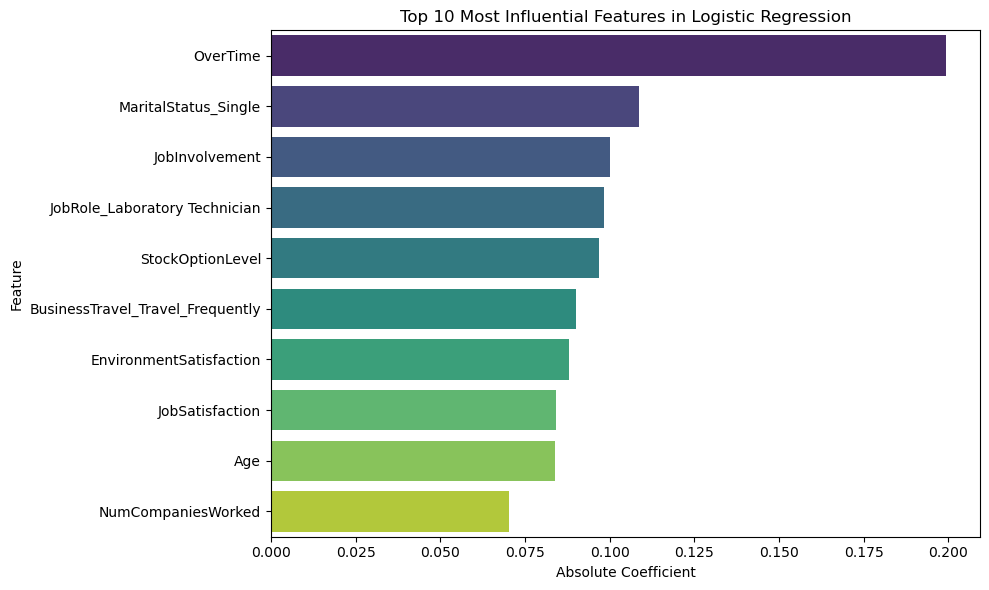

In [101]:
# Select top N features by absolute coefficient
top_n = 10
top_features = coef_df.head(top_n)

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='Abs_Coefficient', y='Feature', data=top_features, palette='viridis')
plt.title(f'Top {top_n} Most Influential Features in Logistic Regression')
plt.xlabel('Absolute Coefficient')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()


- Employees working overtime and single individuals are more likely to leave.
- Higher job involvement, more stock options, or certain job roles correlate negatively with attrition.

- After thorough use of various models and fine tuning, Logistic regression with altered threshold of 0.4 gives a decent model with approx 80% of accuracy and a recall of approx. 70% on test set.

- The reason to target a high recall was to not miss out any possible attrition of employees, even though flagging a few employees under the attrition flag will not be harmful rather than missing out on employees who might actually leave.